In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the csv file into a pandas DataFrame
gold = pd.read_csv('../Resources/final_gold_data.csv')
gold.head()

,Year,Month,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,1979,1,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,1979,2,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,1979,3,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,1979,4,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,1979,5,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


##Linear Models

In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = gold.Inflation_Value.values.reshape(-1, 1)
y = gold.us_dollar.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (492, 1) (492, 1)


array([[ 9.3],
       [ 9.9],
       [10.1],
       [10.5],
       [10.9],
       [10.9],
       [11.3],
       [11.8],
       [12.2],
       [12.1],
       [12.6],
       [13.3],
       [13.9],
       [14.2],
       [14.8],
       [14.7],
       [14.4],
       [14.4],
       [13.1],
       [12.9],
       [12.6],
       [12.8],
       [12.6],
       [12.5],
       [11.8],
       [11.4],
       [10.5],
       [10. ],
       [ 9.8],
       [ 9.6],
       [10.8],
       [10.8],
       [11. ],
       [10.1],
       [ 9.6],
       [ 8.9],
       [ 8.4],
       [ 7.6],
       [ 6.8],
       [ 6.5],
       [ 6.7],
       [ 7.1],
       [ 6.4],
       [ 5.9],
       [ 5. ],
       [ 5.1],
       [ 4.6],
       [ 3.8],
       [ 3.7],
       [ 3.5],
       [ 3.6],
       [ 3.9],
       [ 3.5],
       [ 2.6],
       [ 2.5],
       [ 2.6],
       [ 2.9],
       [ 2.9],
       [ 3.3],
       [ 3.8],
       [ 4.2],
       [ 4.6],
       [ 4.8],
       [ 4.6],
       [ 4.2],
       [ 4.2],
       [ 4

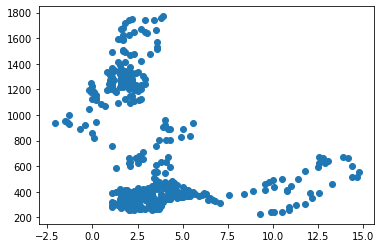

In [4]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [5]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression

# YOUR CODE HERE
model = LinearRegression()
model

LinearRegression()

In [6]:
# Fit the model to the data. 
model.fit(X, y)
print(model)

LinearRegression()


In [8]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-46.44972306]]
y-axis intercept:  [809.99621599]


In [9]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-2.1]]
Max X Value: [[14.8]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [227.2909091]
Predicted output: [378.0137915]
Prediction Error: [150.7228824]


In [11]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
x_min = X.min()
x_max = X.max()
y_min = model.predict([[x_min]])
y_max = model.predict([[x_max]])
print(y_min, y_max)

[[907.54063442]] [[122.54031464]]


In [12]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

IndexError: invalid index to scalar variable.

##Model using Inflation (X) vs US Gold Price (y)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 168098.1146495102
R-squared (R2 ): 0.08794973216949464


In [14]:
# Overall Score for the model
model.score(X, y)

0.08794973216949464

In [ ]:
## Model using US Dollar Index (z) vs US Gold Prices (y)

In [15]:
z = gold.dollar_index.values.reshape(-1,1)

In [16]:
new_model = LinearRegression()
new_model

LinearRegression()

In [17]:
new_model.fit(z, y)
print(model)

LinearRegression()


In [18]:
print('Weight coefficients: ', new_model.coef_)
print('y-axis intercept: ', new_model.intercept_) 

Weight coefficients:  [[-17.94163456]]
y-axis intercept:  [2378.51347478]


In [20]:
z_min = np.array([[z.min()]])
z_max = np.array([[z.max()]])
print(f"Min Z Value: {z_min}")
print(f"Max Z Value: {z_max}")

Min Z Value: [[80.241]]
Max Z Value: [[128.437]]


In [24]:
predictions =  new_model.predict(z)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [227.2909091]
Predicted output: [831.24485154]
Prediction Error: [603.95394244]


In [25]:
z_min = z.min()
z_max = z.max()
y_min = new_model.predict([[z_min]])
y_max = new_model.predict([[z_max]])
print(y_min, y_max)

[[938.85877566]] [[74.14375618]]


In [27]:
# Use our model to predict a value
predicted = new_model.predict(z)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 155110.730117371
R-squared (R2 ): 0.1584154097034326


In [28]:
new_model.score(z,y)

0.1584154097034326

In [9]:
from sklearn.model_selection import train_test_split

In [8]:
# Use sklearn's `train_test_split` to split the data into training and testing



# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
z_train, z_test, y_train, y_test = train_test_split(z, y, random_state=42)

NameError: name 'z' is not defined

In [31]:
model.fit(X_train, y_train)
new_model.fit(z_train, y_train)
print(model)
print(new_model)

LinearRegression()
LinearRegression()


In [34]:
predicted = model.predict(X)
# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 168323.5162326545
R-squared (R2 ): 0.08672677036111953


In [35]:
new_predicted = new_model.predict(z)
# Score the prediction with mse and r2
new_mse = mean_squared_error(y, new_predicted)
new_r2 = r2_score(y, new_predicted)

print(f"Mean Squared Error (MSE): {new_mse}")
print(f"R-squared (R2 ): {new_r2}")

Mean Squared Error (MSE): 155672.45364844805
R-squared (R2 ): 0.15536766524756085


<ipython-input-37-31c3981290ad>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig, elev=20, azim=45)


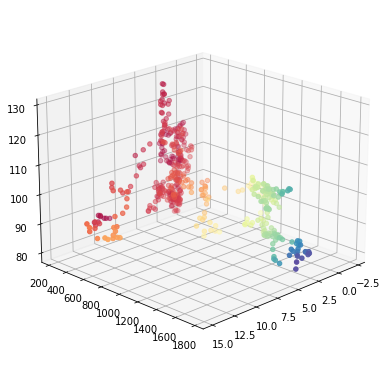

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], y[:,0], z[:,0], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [38]:

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
z_scaler = StandardScaler().fit(z_train)

#Neural Network

In [11]:
values = ["Inflation_Value","dollar_index","us_dollar"]
gold_network_data = gold[["Inflation_Value","dollar_index","us_dollar"]]
gold_network_data.head()

,Inflation_Value,dollar_index,us_dollar
0,9.3,86.239,227.290909
1,9.9,87.082,245.690000
2,10.1,87.280,242.063636
3,10.5,88.228,238.685714
4,10.9,89.270,257.800000


In [12]:
X = gold_network_data.drop(["us_dollar"], axis = 1)
y = gold_network_data['us_dollar']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(393, 2)

In [14]:
X_test.shape

(99, 2)

In [15]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [17]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_scaled))


In [49]:
print(normalizer.mean.numpy())

[-8.3819032e-09  1.3969839e-08]


In [18]:
gold_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

gold_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


In [19]:
gold_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [21]:
gold_model.fit(train_scaled, y_train, epochs = 1000, verbose = 2)

240
Epoch 536/1000
13/13 - 0s - loss: 289.0225
Epoch 537/1000
13/13 - 0s - loss: 289.0302
Epoch 538/1000
13/13 - 0s - loss: 289.0248
Epoch 539/1000
13/13 - 0s - loss: 289.0262
Epoch 540/1000
13/13 - 0s - loss: 289.0256
Epoch 541/1000
13/13 - 0s - loss: 289.0290
Epoch 542/1000
13/13 - 0s - loss: 289.0240
Epoch 543/1000
13/13 - 0s - loss: 289.0193
Epoch 544/1000
13/13 - 0s - loss: 289.0261
Epoch 545/1000
13/13 - 0s - loss: 289.0228
Epoch 546/1000
13/13 - 0s - loss: 289.0220
Epoch 547/1000
13/13 - 0s - loss: 289.0207
Epoch 548/1000
13/13 - 0s - loss: 289.0244
Epoch 549/1000
13/13 - 0s - loss: 289.0248
Epoch 550/1000
13/13 - 0s - loss: 289.0217
Epoch 551/1000
13/13 - 0s - loss: 289.0295
Epoch 552/1000
13/13 - 0s - loss: 289.0268
Epoch 553/1000
13/13 - 0s - loss: 289.0215
Epoch 554/1000
13/13 - 0s - loss: 289.0226
Epoch 555/1000
13/13 - 0s - loss: 289.0213
Epoch 556/1000
13/13 - 0s - loss: 289.0269
Epoch 557/1000
13/13 - 0s - loss: 289.0272
Epoch 558/1000
13/13 - 0s - loss: 289.0272
Epoch 5

In [22]:
model_loss, model_accuracy = gold_model.evaluate(
    test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 336.2015


TypeError: cannot unpack non-iterable float object

<function matplotlib.pyplot.show(close=None, block=None)>

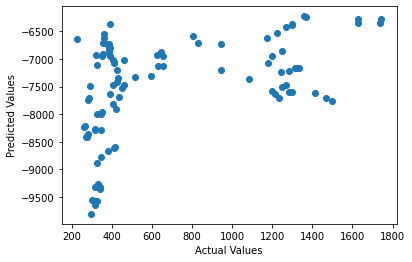

In [23]:
test_predictions = gold_model.predict(X_test).flatten()
plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Values")
plt.ylabel('Predicted Values')
plt.show